In [1]:
import pandas as pd
from google.colab import drive
import os
import spacy

In [2]:
drive.mount('/content/drive')
os.getcwd()
os.listdir()
os.chdir("/content/drive/MyDrive/Colab Notebooks/NLP/data")
os.listdir()

Mounted at /content/drive


['all_tickets.csv',
 'reading_600_texts.csv',
 'reading_600_texts_metadata_only.csv',
 'Moving beyond classic readability formulas.pdf',
 'all_excerpts',
 'reading_data_morphemes.csv',
 'writing_data_w_meta_data.csv',
 'nrc.csv',
 'CRAPII_practice',
 'ticket_data.csv',
 'CLEAR_corpus_final.xlsx',
 'readability_model_checkpoints',
 'readability_model_1',
 'reading_600_texts_trf_readability.csv',
 'data_ticket.csv']

In [3]:
# Read my data
df = pd.read_csv('data_ticket.csv', encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
 9   title_body        48549 non-null  object
dtypes: int64(7), object(3)
memory usage: 3.7+ MB


In [4]:
# Combine the title and body column
df['title_body'] = df.apply(lambda row: 'no title: ' + row['body'] if pd.isnull(row['title']) or row['title'].strip() == '' else row['title'] + ': ' + row['body'], axis=1)
df['title_body'] = df['title_body'].str.lower()
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,title_body
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,2,4,no title: hi since recruiter lead permission a...
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,2,4,connection with icon: icon dear please setup i...
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,1,4,work experience user: work experience user hi ...
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4,requesting for meeting: requesting meeting hi ...
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,1,4,reset passwords for external accounts: re expi...


In [5]:
distinct_values = df['urgency'].unique()
distinct_values

array([2, 1, 3, 0])

In [6]:
print(df['urgency'].isnull().values.any())
print(df['title_body'].isnull().values.any())

False
False


In [7]:
df_sampled = df[['title_body','urgency']]
df_sampled.head()

,title_body,urgency
0,no title: hi since recruiter lead permission a...,2
1,connection with icon: icon dear please setup i...,2
2,work experience user: work experience user hi ...,1
3,requesting for meeting: requesting meeting hi ...,3
4,reset passwords for external accounts: re expi...,1


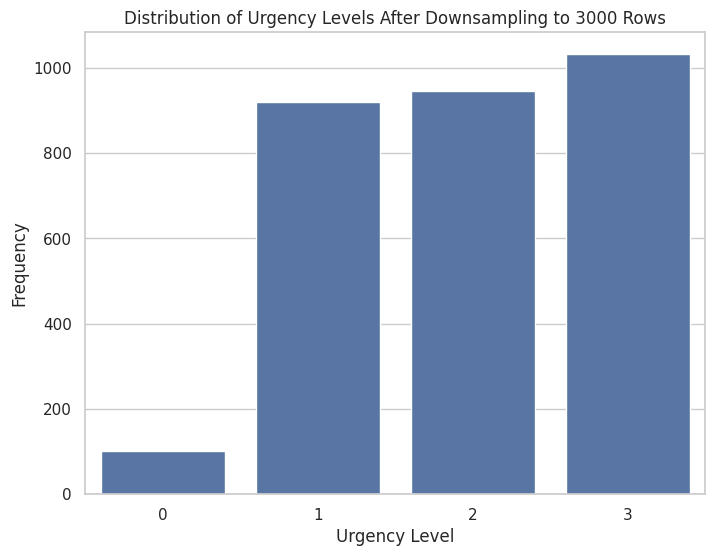

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your existing DataFrame

# Total number of samples you want
total_samples = 3000

# Calculate the distribution of each urgency level
urgency_counts = df['urgency'].value_counts(normalize=True)

# Calculate number of samples to take from each group
samples_per_group = (urgency_counts * total_samples).round().astype(int)

# Sample from each group
df_sampled = pd.concat([
    df[df['urgency'] == level].sample(n=samples, random_state=42)  # Adding a random state for reproducibility
    for level, samples in samples_per_group.items()
], ignore_index=True)  # Ignore index to avoid duplicate indices

# Plotting the result
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_sampled, x='urgency')
plt.title('Distribution of Urgency Levels After Downsampling to 3000 Rows')
plt.xlabel('Urgency Level')
plt.ylabel('Frequency')
plt.show()


In [9]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
import spacy

# stopwords
stop_words = STOP_WORDS

# Load English tokenizer. We don't need the parser or named entity recognition for this task, so we can leave them out.
nlp = spacy.load('en_core_web_sm', exclude=["parser", "ner"])

# We will need to provide a tokenization function to our vectorizers
# You just need to provide the docs object and add lowercase=False to your vectorizers
# to prevent the vectorizers from trying to do any string processing before tokenization

def tokenize_docs(doc):
  tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space]
  return [tok for tok in tokens if tok not in stop_words]

In [10]:
docs = list(nlp.pipe(df_sampled.title_body))

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# initialize the CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False)#, min_df=5)

# fit the CountVectorizer to the data
X = count_vectorizer.fit_transform(docs)

# convert it to an array and output a pandas dataframe
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = count_vectorizer.get_feature_names_out() # this method returns the vocabulary
print(f'Dataframe Shape: {bow_df.shape}')
bow_df

Dataframe Shape: (3000, 3784)


,ab,abandon,abbreviation,abc,abeam,ability,able,abort,abroad,absence,...,yes,yesterday,yr,zealand,zebra,zeiss,zen,zero,zip,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Term Frequency Distribution')

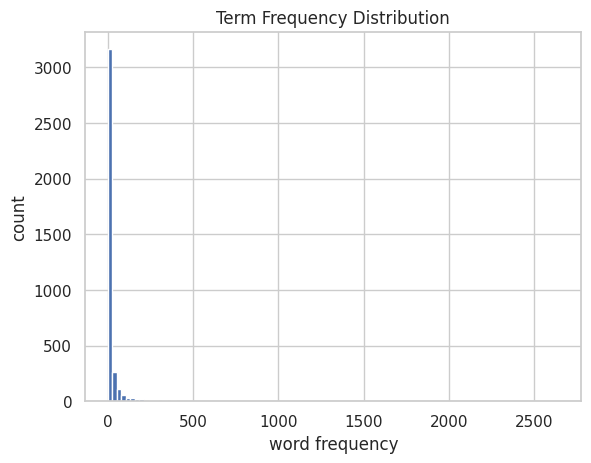

In [12]:
import matplotlib.pyplot as plt
bow_df.sum().plot.hist(bins=100)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=5)
# Fit it to the data
X = tfidf_vectorizer.fit_transform(docs)
# Output a dataframe
tfidf_df = pd.DataFrame(X.toarray())
tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
print(f'Dataframe Shape: {tfidf_df.shape}')
tfidf_df

Dataframe Shape: (3000, 1418)


,ability,able,absence,accept,acceptance,access,accessible,accessing,accommodate,accord,...,workstation,worry,write,writing,wrong,year,yellow,yes,yesterday,zone
0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.149024,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.07466,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2996,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2997,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2998,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [14]:
# sklearn has a package to split the data into train and test groups
from sklearn.model_selection import train_test_split
seed = 42 # set your random seed

X = df_sampled['title_body'] # the features we want to analyze
ylabels = df_sampled['urgency']

# the labels, or answers, we want to test against
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state = seed)
X_train = list(nlp.pipe(X_train))
X_test = list(nlp.pipe(X_test))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(class_weight='balanced')

# When we are doing a multistep process in sklearn, it's best to set it up as a pipeline
pipe = Pipeline([('vectorizer', tfidf_vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False, min_df=5, token_pattern=None,
                                 tokenizer=<function tokenize_docs at 0x7dd43b4c9630>)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [16]:
from sklearn import metrics

# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, predicted))

# Specifying the averaging method for multiclass classification
average_method = 'weighted'  # You can choose 'micro', 'macro', 'weighted', or None

print("Logistic Regression Precision:", metrics.precision_score(y_test, predicted, average=average_method))
print("Logistic Regression Recall:", metrics.recall_score(y_test, predicted, average=average_method))

Logistic Regression Accuracy: 0.43833333333333335
Logistic Regression Precision: 0.4344867149758454
Logistic Regression Recall: 0.43833333333333335


              precision    recall  f1-score   support

           0       0.25      0.59      0.35        17
           1       0.42      0.31      0.36       171
           2       0.37      0.31      0.34       191
           3       0.51      0.63      0.57       221

    accuracy                           0.44       600
   macro avg       0.39      0.46      0.40       600
weighted avg       0.43      0.44      0.43       600



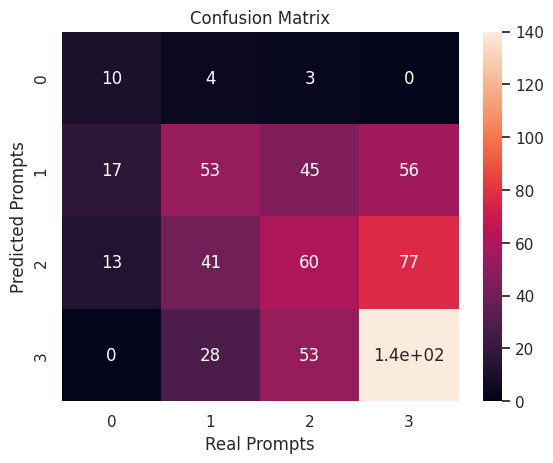

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check out a classification report
print(metrics.classification_report(y_test, predicted))

# We can also look at incorrect predictions in a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Real Prompts')
plt.ylabel('Predicted Prompts')
plt.show()

In [18]:
# Create a DataFrame for each set of domain coefficients
domain_dfs = []

for domain_index in range(len(classifier.classes_)):  # Loop through each domain
    domain_name = classifier.classes_[domain_index]  # Get the domain name/class label
    coef_df = pd.DataFrame({
        f'coefficients_{domain_name}': classifier.coef_[domain_index],  # Coefficients for this domain
        'vocabulary': tfidf_vectorizer.get_feature_names_out()  # Get feature names from the vectorizer
    })

    # Sort by coefficients to find the most and least influential words for this domain
    lowest = coef_df.sort_values(by=f'coefficients_{domain_name}').head(20).reset_index(drop=True)
    highest = coef_df.sort_values(by=f'coefficients_{domain_name}', ascending=False).head(20).reset_index(drop=True)

    # Combine the most and least influential words into one DataFrame
    domain_df = pd.concat([lowest, highest], axis=1, keys=['Lowest', 'Highest'])

    # Append the DataFrame for this domain to the list
    domain_dfs.append(domain_df)

# concatenate all domain DataFrames for a comprehensive view
all_domains_df = pd.concat(domain_dfs, axis=1, keys=classifier.classes_)
all_domains_df

0                                                     1  \
           Lowest                   Highest                      Lowest   
   coefficients_0 vocabulary coefficients_0   vocabulary coefficients_1   
0       -2.722414         pm       6.549300         send      -0.997198   
1       -1.628070       card       2.376139         lock      -0.973632   
2       -1.583441    october       2.348405   connection      -0.949567   
3       -1.428288       kind       2.277105     password      -0.887192   
4       -1.382564     update       2.057536      connect      -0.862635   
5       -1.346043     oracle       2.006292        token      -0.861968   
6       -1.282640      thank       2.002684         high      -0.848350   
7       -1.170886      hello       1.932258       server      -0.814906   
8       -1.042889       look       1.836630     external      -0.805135   
9       -0.982109      right       1.804273         work      -0.804421   
10      -0.953003        log       1.798358      restore      -0.792740   
11      -0.933826       room       1.769975       access      -0.790914   
12      -0.919414        day       1.710696         able      -0.782227   
13      -0.918442     urgent       1.614601        block      -0.781307   
14      -0.909007    upgrade       1.610745      charger      -0.774249   
15      -0.895837     advise       1.609922         wire      -0.761512   
16      -0.860783    require       1.570604     incident      -0.753412   
17      -0.855704     submit       1.567761  unavailable      -0.744804   
18      -0.817534       find       1.518473      outlook      -0.714848   
19      -0.814003      title       1.511895      machine      -0.704951   

                                                         2             \
                         Highest                    Lowest              
       vocabulary coefficients_1 vocabulary coefficients_2 vocabulary   
0           reach       1.432051       fail      -1.793255       send   
1   configuration       1.056305       look      -1.272302  wednesday   
2         machine       1.043266     monday      -1.231470    charger   
3         analyst       1.026417    manager      -1.171854    connect   
4           board       0.942801       card      -1.096059         pc   
5          delete       0.929743     screen      -1.049825     access   
6         receive       0.921987   redirect      -1.016022    tuesday   
7         outlook       0.896288    tuesday      -0.999002     server   
8        approver       0.871431    approve      -0.922204    restore   
9      connection       0.842631      error      -0.902035       lock   
10        payable       0.842525     unlock      -0.890906      token   
11           info       0.827351       open      -0.876612         sd   
12           path       0.812253    upgrade      -0.874966       able   
13       director       0.801348        try      -0.858135   password   
14          image       0.789156     update      -0.808665      tower   
15          block       0.772931     unable      -0.805264       high   
16       possible       0.767806    expense      -0.795330       role   
17        battery       0.762575    anymore      -0.789899      guest   
18            etc       0.760647      phone      -0.784651    machine   
19    coordinator       0.759304   location      -0.776923   priority   

                                          3                                 \
          Highest                    Lowest                        Highest   
   coefficients_2 vocabulary coefficients_3      vocabulary coefficients_3   
0        1.363595      alert      -5.058846            send       1.664770   
1        1.158870         pm      -1.785302           issue       1.052841   
2        1.115361    analyst      -1.722030         manager       1.007334   
3        0.986371     member      -1.656954              en       0.961631   
4        0.965682    forward      -1.452441           error     